<a href="https://colab.research.google.com/github/Bungaacnty/DataScience/blob/main/Ecommerce_Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecommerce Customer Behavior - Dummy Project

# 0. Import Module/Package

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Business Understanding

## 1.1 Background

Dalam persaingan bisnis yang ketat pada bidang supermarket, Supermarket X merupakan salah satu supermarket yang memiliki performa yang cukup baik dalam penjualannya. Maka dari itu, untuk tetap mempertahankan serta meningkatkan performa penjualan pada Supermarket X, dibutuhkan analisis kebiasaan customer yang dapat menjadi pertimbangan dalam perbaikan produk-produk apa saja yang harus diperhatikan pada Supermarket X supaya Supermarket X terhindar dari kebrangkutan.

## 1.2 Goals

Mengetahui produk apa saja yang perlu menjadi perhatian guna meningkatkan performa penjualan Supermarket X.

# 2. Data Preparation

## 2.1 Data Understanding

In [82]:
# Membaca dataset News dari Google Drive

file_path = '/content/drive/My Drive/PROJECT PORTOFOLIO/Ecommerce/E-commerce Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

**Insight**: Dataset terdiri dari 16 kolum di mana kolom-kolom tersebut terdiri dari tipe object, float, dan integer


## 2.2 Data Cleaning

In [84]:
# Memeriksa nilai NaN dari masing-masing kolom

df.isna().sum()

,0
Order_Date,0
Time,0
Aging,1
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,1


**Insight**: Diperoleh bahwa masih ada beberapa kolom seperti Aging, Sales, Quantity, Discount, Shipping_Cost, dan Order_Priority yang memiliki nilai kosong di dalamnya.

In [85]:
# Mengatasi nilai NaN

Data = df.dropna()
Data.isna().sum()

,0
Order_Date,0
Time,0
Aging,0
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,0


**Insight**: Nilai NaN diatasi dengan metode dropna, di mana semua baris dalam dataset yang setidaknya memiliki satu nilai NaN atau nilai kosong.

In [86]:
Data.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000
mean,5.255187,58159.746656,152.337350,2.502964,0.303838,70.401796,7.041166
std,2.960073,26031.763189,66.492468,1.511834,0.131025,48.728131,4.871685
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35841.500000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61021.500000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80739.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


**Insight**: Deskripsi data menunjukkan bahwa rata-rata penjualan produk dari Supermarket X adalah 152,34 dengan rata-rata penjualan dalam satu kali transaksi adalah sebanyak 2 unit, waktu maksimal pengiriman adalah 10 hari, dan diskon terendah yang diberikan adalah 10%.

# 3. Exploratory Data Analysis

### 3.1 Total Penjualan Berdasarkan Kategori

In [87]:
# Menghitung total barang yang berhasil dijual dan pendapatan yang diperoleh
total_penjualan = Data['Quantity'].sum()
total_pendapatan = Data['Profit'].sum()

# Membuat data frame baru
df_penjualan = pd.DataFrame({'Total Penjualan': [total_penjualan], 'Total Pendapatan': [total_pendapatan]})

# Menampilkan data frame baru
df_penjualan

,Total Penjualan,Total Pendapatan
0,128357.0,3610344.9


**Insight**: Total penjualan keseluruhan produk dari Supermarket X adalah sebanyak 128.357 dengan total pendapatan yang diperoleh sebesar 3.610.344,9 USD.

In [88]:
# Menghitung total barang terjual dan total pendapatan berdasarkan kategori
Data['total_pendapatan'] = Data['Quantity'] * Data['Profit']

# Change 'df' to 'Data' in the groupby operation
market_revenue = Data.groupby('Product').agg(
    total_penjualan=('Quantity', 'sum'),
    total_pendapatan=('total_pendapatan', 'sum')
).reset_index()

# Menampilkan hasil
market_revenue

<ipython-input-88-5335c438713a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['total_pendapatan'] = Data['Quantity'] * Data['Profit']


,Product,total_penjualan,total_pendapatan
0,Apple Laptop,492.0,72685.0
1,Bed Sheets,3819.0,411829.3
2,Beds,3908.0,102484.2
3,Bike Tyres,1911.0,46156.8
4,Car & Bike Care,1939.0,47720.0
5,Car Body Covers,2040.0,48675.2
6,Car Mat,1915.0,35244.0
7,Car Media Players,1863.0,85212.2
8,Car Pillow & Neck Rest,2012.0,252111.1
9,Car Seat Covers,1896.0,41010.8


#### 3.1.1 Analisis penjualan berdasarkan total pendapatan

In [89]:
# Mengurutkan produk berdasarkan total_pendapatan terbesar

market_revenue_sorted = market_revenue.sort_values(by='total_pendapatan', ascending=False)
market_revenue_sorted

,Product,total_penjualan,total_pendapatan
35,T - Shirts,5986.0,843691.0
37,Titak watch,6254.0,767266.9
25,Running Shoes,6064.0,726277.8
19,Jeans,5946.0,680061.3
16,Formal Shoes,6154.0,674108.2
27,Shirts,6012.0,568111.3
38,Towels,3781.0,468686.0
30,Sofa Covers,3852.0,434554.8
1,Bed Sheets,3819.0,411829.3
17,Fossil Watch,6050.0,373000.4


In [90]:
# Membagi data menjadi 2 kategori

penjualan_tertinggi = market_revenue_sorted.head(10)
penjualan_terendah = market_revenue_sorted.tail(10)

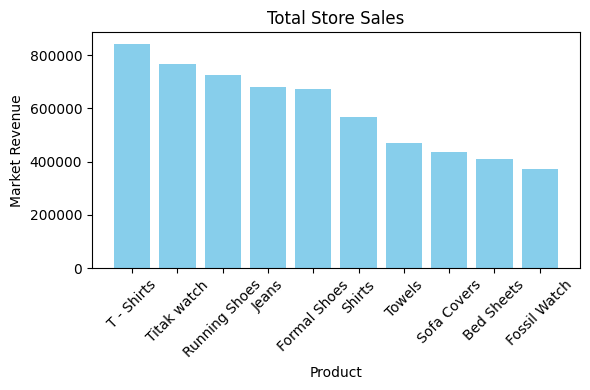

In [91]:
# Data
Product = penjualan_tertinggi['Product']
Market_Revenue = penjualan_tertinggi['total_pendapatan']

# Membuat grafik
plt.figure(figsize=(6, 4))
plt.bar(Product, Market_Revenue, color='skyblue')  # Use Product and Market_Revenue
plt.title('Total Store Sales')
plt.xlabel('Product')
plt.ylabel('Market Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Insight**: Produk T-Shirt memiliki performa perolehan pendapatan tertinggi dengan total lebih dari 800.000 USD.

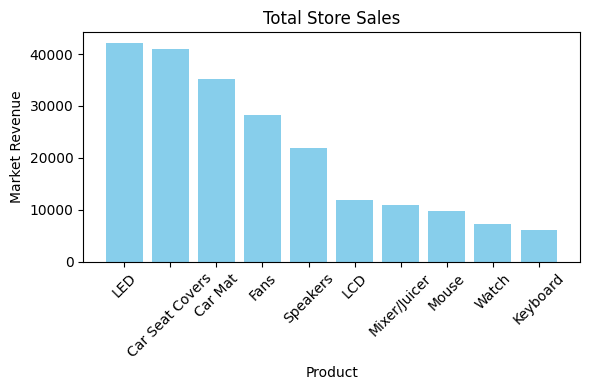

In [92]:
# Data
Product = penjualan_terendah['Product']
Market_Revenue = penjualan_terendah['total_pendapatan']

# Membuat grafik
plt.figure(figsize=(6, 4))
plt.bar(Product, Market_Revenue, color='skyblue')
plt.title('Total Store Sales')
plt.xlabel('Product')
plt.ylabel('Market Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Insight**: Produk LCD, Mixer/Juice, Mouse, Watch, Keyboard merupakan 5 produk terendah apabila diperhatikan dari segi total pendapatannya.

#### 3.1.1 Analisis penjualan berdasarkan total penjualan

In [93]:
# Mengurutkan produk berdasarkan total_penjualan terbesar

market_revenue_sorted2 = market_revenue.sort_values(by='total_penjualan', ascending=False)
market_revenue_sorted2

,Product,total_penjualan,total_pendapatan
37,Titak watch,6254.0,767266.9
16,Formal Shoes,6154.0,674108.2
33,Sports Wear,6093.0,105364.9
25,Running Shoes,6064.0,726277.8
17,Fossil Watch,6050.0,373000.4
29,Sneakers,6049.0,128079.0
11,Casula Shoes,6035.0,171496.5
27,Shirts,6012.0,568111.3
34,Suits,5996.0,101671.5
35,T - Shirts,5986.0,843691.0


In [94]:
# Membagi data menjadi 2 kategori

penjualan_terlaris = market_revenue_sorted2.head(10)
penjualan_tersepi = market_revenue_sorted2.tail(10)

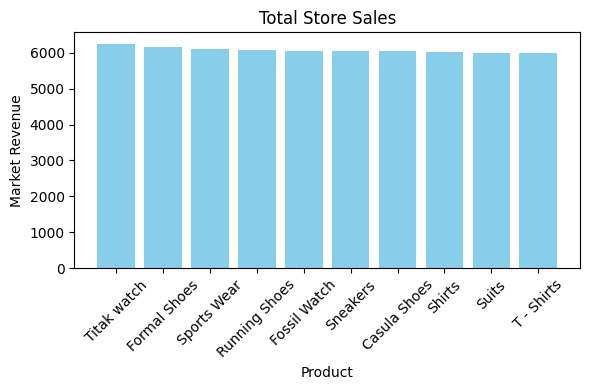

In [95]:
# Data
Product = penjualan_terlaris['Product']
Market_Revenue = penjualan_terlaris['total_penjualan']

# Membuat grafik
plt.figure(figsize=(6, 4))
plt.bar(Product, Market_Revenue, color='skyblue')
plt.title('Total Store Sales')
plt.xlabel('Product')
plt.ylabel('Market Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Insight**: Produk Tiktak watch memiliki performa perolehan penjualan tertinggi dengan total produk terjual lebih dari 6.000 unit.

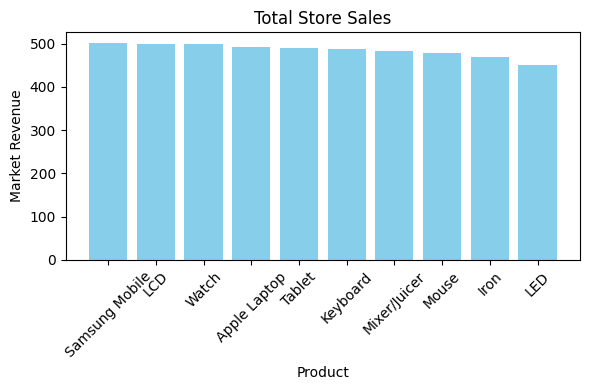

In [96]:
# Data
Product = penjualan_tersepi['Product']
Market_Revenue = penjualan_tersepi['total_penjualan']

# Membuat grafik
plt.figure(figsize=(6, 4))
plt.bar(Product, Market_Revenue, color='skyblue')
plt.title('Total Store Sales')
plt.xlabel('Product')
plt.ylabel('Market Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Insight**: Produk Keyboard, Mixer/Juice, Mouse, Iron, LED merupakan 5 produk terendah apabila diperhatikan dari segi total penjualannya.

### 3.2 Customer Behavior pada Penjualan Barang Terendah

In [97]:
# Membentuk dataframe baru berdasarkan penjualan dan pemerolehan profit produk terendah

ProductConcern = Data[Data['Product'].isin(['LED','Iron','Mouse','Mixer/Juicer','Keyboard','Watch','LCD'])]
ProductConcern

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,total_pendapatan
17764,2018-09-05,14:39:08,5.0,46514,Female,Web,Member,Electronic,Watch,104.0,1.0,0.1,20.9,2.1,Critical,money_order,20.9
17766,2018-07-01,20:25:32,3.0,53818,Male,Web,Member,Electronic,Iron,222.0,4.0,0.1,115.4,11.5,High,credit_card,461.6
17768,2018-09-22,18:41:27,1.0,31394,Male,Web,Member,Electronic,Mouse,111.0,2.0,0.1,28.8,2.9,Medium,credit_card,57.6
17769,2018-07-05,16:10:12,8.0,51519,Female,Web,Member,Electronic,Keyboard,33.0,4.0,0.1,8.3,0.8,High,credit_card,33.2
17771,2018-05-12,22:34:49,4.0,23022,Male,Web,Member,Electronic,Mixer/Juicer,83.0,4.0,0.2,20.8,2.1,Medium,credit_card,83.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20456,2018-06-22,17:08:00,3.0,26685,Female,Web,Member,Electronic,Watch,104.0,1.0,0.1,8.4,0.8,Medium,credit_card,8.4
20458,2018-11-11,12:07:04,7.0,32164,Female,Web,Member,Electronic,Iron,222.0,4.0,0.2,97.6,9.8,High,credit_card,390.4
20460,2018-11-15,12:24:12,6.0,37579,Female,Web,Member,Electronic,Mouse,111.0,3.0,0.2,24.3,2.4,Medium,credit_card,72.9
20461,2018-10-12,08:29:53,9.0,17879,Female,Web,Member,Electronic,Keyboard,33.0,1.0,0.1,6.6,0.7,Medium,credit_card,6.6


In [98]:
# Deskripsi mengenai data

ProductConcern.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,total_pendapatan
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,5.352185,35215.627249,115.700514,2.161954,0.158740,45.197558,4.528213,92.921530
std,2.885935,14550.920133,62.956211,1.165194,0.049246,42.368039,4.233760,108.344771
min,1.000000,10044.000000,33.000000,1.000000,0.100000,0.500000,0.100000,0.500000
25%,3.000000,22737.500000,65.000000,1.000000,0.100000,15.700000,1.600000,28.525000
50%,5.000000,35572.000000,104.000000,2.000000,0.200000,22.100000,2.200000,65.000000
75%,8.000000,47618.750000,192.000000,3.000000,0.200000,83.200000,8.300000,92.800000
max,10.000000,59982.000000,222.000000,4.000000,0.200000,139.800000,14.000000,532.400000


In [99]:
# Convert the date column to datetime
ProductConcern['Order_Date'] = pd.to_datetime(ProductConcern['Order_Date'])

<ipython-input-99-b28ed1fb28d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProductConcern['Order_Date'] = pd.to_datetime(ProductConcern['Order_Date'])


#### 3.2.1 By Gender

In [100]:
time_series_data = ProductConcern.groupby(['Gender', 'Order_Date'])['Quantity'].sum().reset_index()

In [101]:
genders = time_series_data['Gender'].unique()
genders

array(['Female', 'Male'], dtype=object)

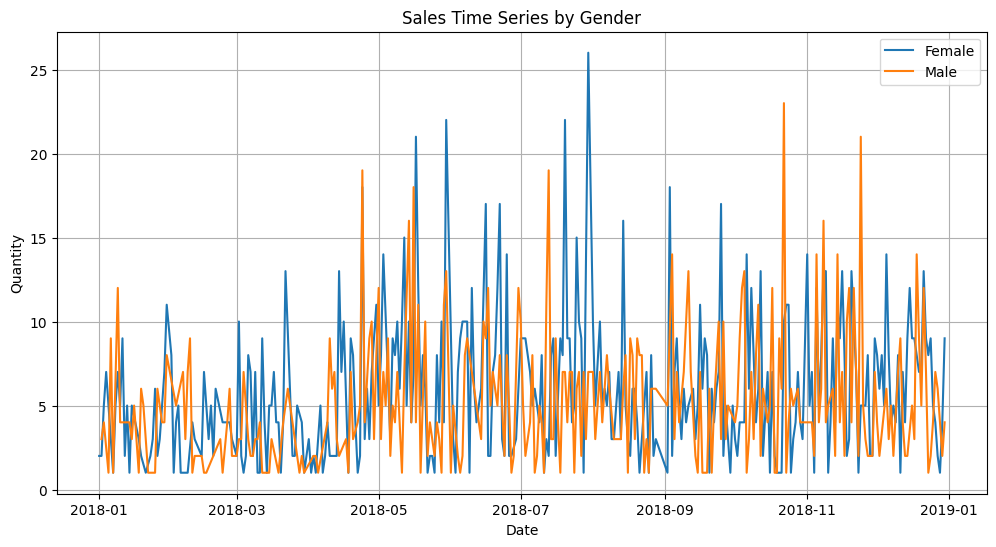

In [102]:
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data[time_series_data['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Quantity'], label=gender)

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()

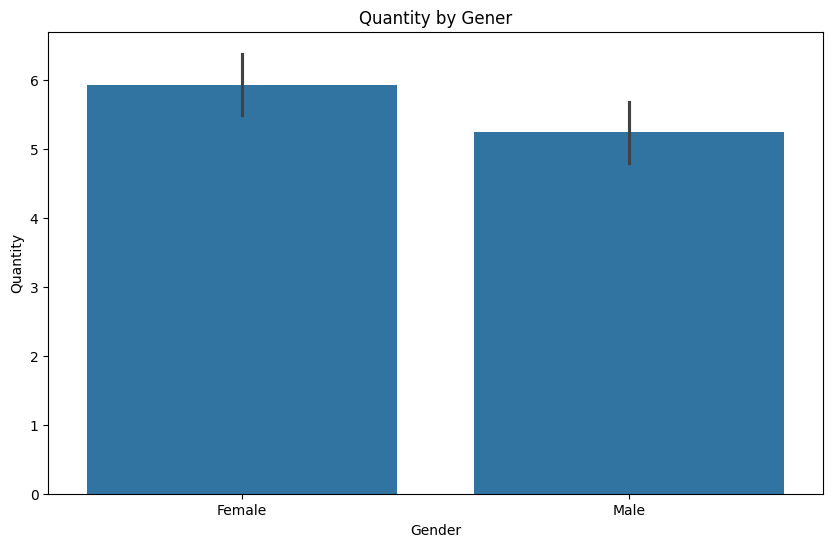

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Quantity', data=time_series_data)
plt.title('Quantity by Gener')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

In [104]:
purchasing_behavior = ProductConcern.groupby('Gender')['Quantity'].sum()
print(purchasing_behavior)

Gender
Female    1854.0
Male      1510.0
Name: Quantity, dtype: float64


**Insight**: Customer berjenis kelamin perempuan lebih banyak dalam pembelian 5 produk terendah pada Supermarket.

#### 3.2.2 By Order Priority

In [105]:
time_series_data2 = ProductConcern.groupby(['Order_Priority', 'Order_Date'])['Quantity'].sum().reset_index()

In [106]:
order_priorities = time_series_data2['Order_Priority'].unique()
order_priorities

array(['Critical', 'High', 'Medium'], dtype=object)

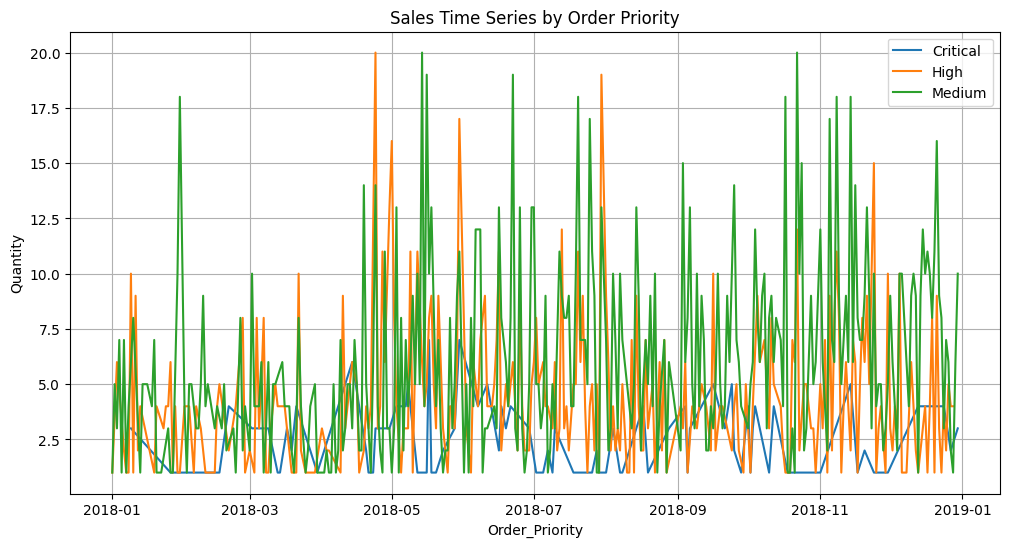

In [107]:
plt.figure(figsize=(12, 6))
for order in order_priorities:
    orderp_data = time_series_data2[time_series_data2['Order_Priority'] == order]
    plt.plot(orderp_data['Order_Date'], orderp_data['Quantity'], label = order)

plt.xlabel('Order_Priority')
plt.ylabel('Quantity')
plt.title('Sales Time Series by Order Priority')
plt.legend()
plt.grid(True)
plt.show()

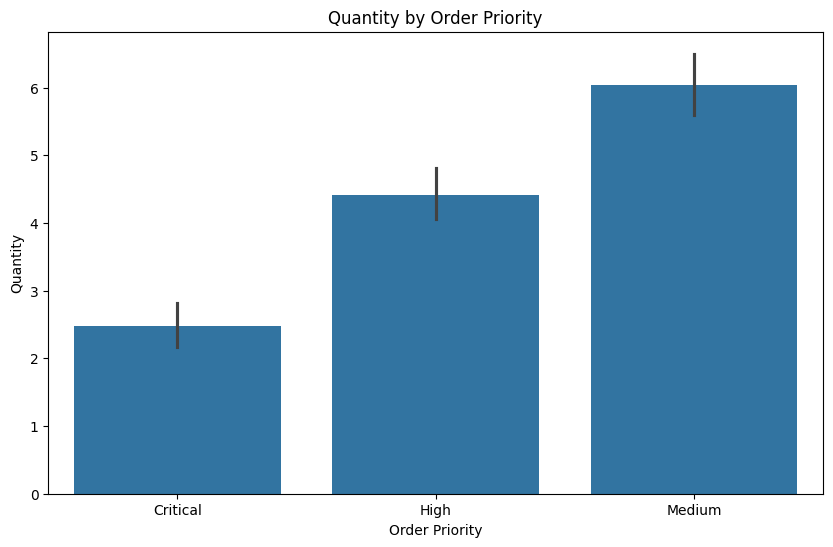

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Priority', y='Quantity', data=time_series_data2)
plt.title('Quantity by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Quantity')
plt.show()

**Insight**: Customer dengan order priority medium merupakan customer terbanyakdalam pembelian 5 produk terendah pada Supermarket.

In [109]:
purchasing_behavior2 = ProductConcern.groupby('Order_Priority')['Quantity'].sum()
print(purchasing_behavior2)

Order_Priority
Critical     221.0
High        1197.0
Medium      1946.0
Name: Quantity, dtype: float64


#### 3.2.3 By Payment Method

In [110]:
time_series_data3 = ProductConcern.groupby(['Payment_method', 'Order_Date'])['Quantity'].sum().reset_index()

In [111]:
payment_method = time_series_data3['Payment_method'].unique()
payment_method

array(['credit_card', 'debit_card', 'e_wallet', 'money_order'],
      dtype=object)

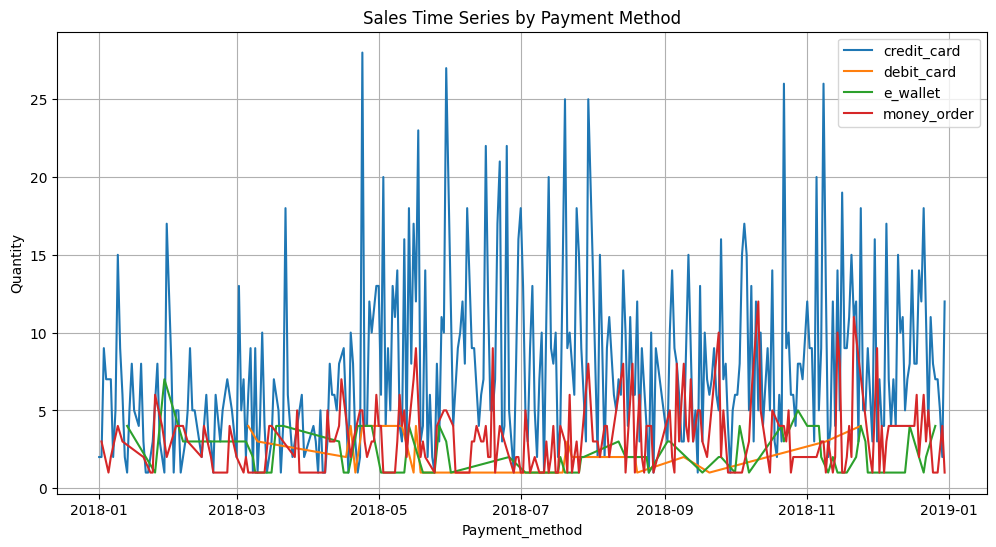

In [112]:
plt.figure(figsize=(12, 6))
for method in payment_method:
    payment = time_series_data3[time_series_data3['Payment_method'] == method]
    plt.plot(payment['Order_Date'], payment['Quantity'], label = method)

plt.xlabel('Payment_method')
plt.ylabel('Quantity')
plt.title('Sales Time Series by Payment Method')
plt.legend()
plt.grid(True)
plt.show()

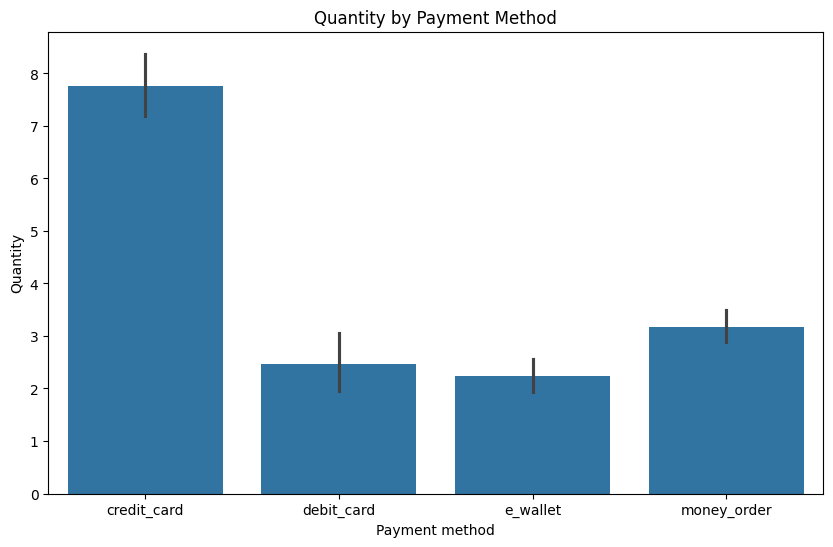

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_method', y='Quantity', data=time_series_data3)
plt.title('Quantity by Payment Method')
plt.xlabel('Payment method')
plt.ylabel('Quantity')
plt.show()

In [114]:
purchasing_behavior3 = ProductConcern.groupby('Payment_method')['Quantity'].sum()
print(purchasing_behavior3)

Payment_method
credit_card    2530.0
debit_card       47.0
e_wallet        155.0
money_order     632.0
Name: Quantity, dtype: float64


**Insight**: Customer yang membeli produk dengan jenis pembayatan credit_card merupakan customer terbanyak dalam pembelian 5 produk terendah pada Supermarket.

### 3.3 Variabel yang Berpengaruh terhadap Quantity dan Profit

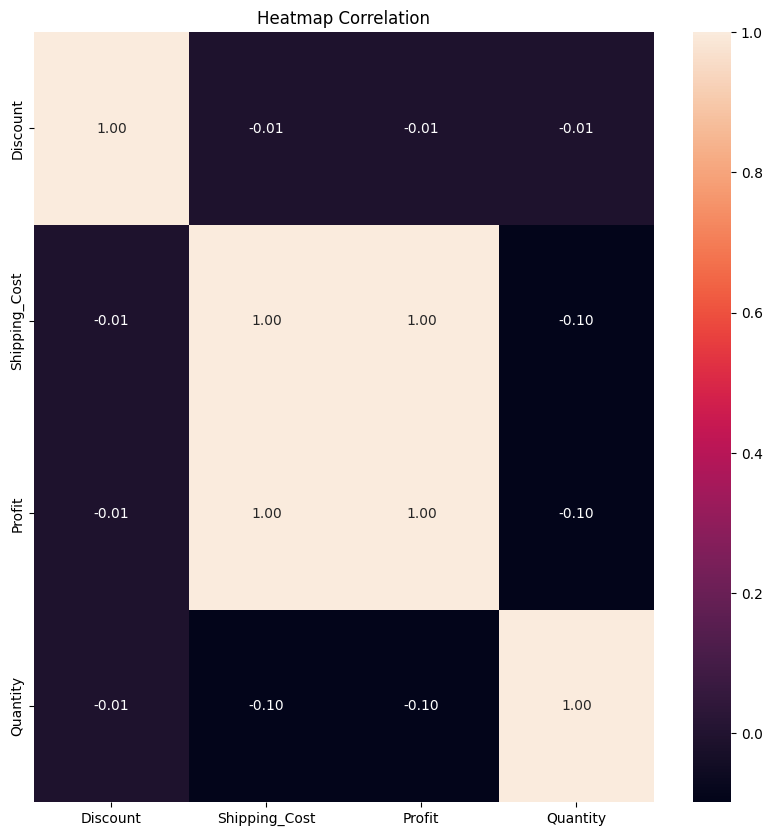

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = [
    'Discount',
    'Shipping_Cost',
    'Profit',
    'Quantity'
]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

corr = ProductConcern[target_col].corr()
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax)
ax.set_title(f'Heatmap Correlation')

plt.show()

**Insight**: Dari korelasi pearson di atas, diperoleh bahwa:



1.   Semakin besar Shipping Cost, maka semakin besar juga Profit yang diperileh
2.   Semakin besar Shipping Cost, maka semakin kecil Quantity



### 3.4 Customer Behavior terhadap Discount

<ipython-input-116-de2368cfdea8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_quantity.index, y=discount_quantity.values, palette="viridis")


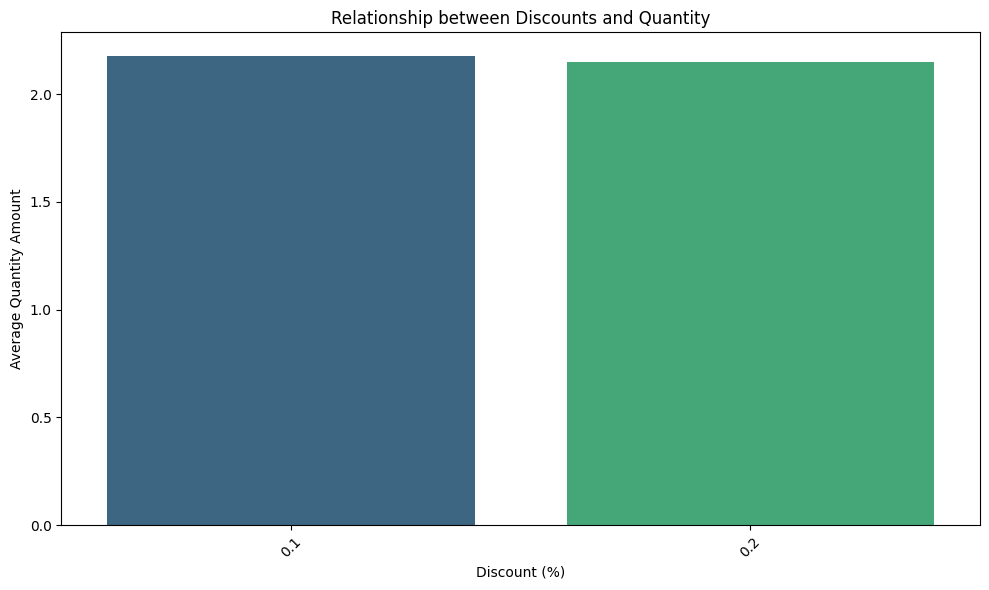

In [116]:
# Study the relationship between discounts and sales
discount_quantity = ProductConcern.groupby('Discount')['Quantity'].mean()

# Create a bar plot to visualize the relationship between discounts and sales
plt.figure(figsize=(10, 6))
sns.barplot(x=discount_quantity.index, y=discount_quantity.values, palette="viridis")
plt.xlabel('Discount (%)')
plt.ylabel('Average Quantity Amount')
plt.title('Relationship between Discounts and Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
cust_behavior = ProductConcern.groupby('Discount')['Quantity'].sum()
print(cust_behavior)

Discount
0.1    1398.0
0.2    1966.0
Name: Quantity, dtype: float64


**Insight**: Penjualan 5 produk terendah pada Supermarket X didominasi oleh produk-produk dengan diskon sebesar 20%

# 4. Deployment

# 5. Summary

Setelah melakukan analisis pada kebiasaan customer pada Supermarket X, diperoleh bahwa:



1.   Produk T-Shirt memiliki performa perolehan pendapatan tertinggi dengan total lebih dari 800.000 USD.
2.   Produk LCD, Mixer/Juice, Mouse, Watch, Keyboard merupakan 5 produk terendah apabila diperhatikan dari segi total pendapatannya.
3. Produk Tiktak watch memiliki performa perolehan penjualan tertinggi dengan total produk terjual lebih dari 6.000 unit.
4. Produk Keyboard, Mixer/Juice, Mouse, Iron, LED merupakan 5 produk terendah apabila diperhatikan dari segi total penjualannya.
5. Customer berjenis kelamin perempuan lebih mendominasi dalam pembelian 5 produk terendah pada Supermarket.
6. Customer dengan order priority medium merupakan customer terbanyakdalam pembelian 5 produk terendah pada Supermarket.
7. Customer yang membeli produk dengan jenis pembayatan credit_card merupakan customer terbanyak dalam pembelian 5 produk terendah pada Supermarket.
8. Semakin besar Shipping Cost, maka semakin besar juga Profit yang diperoleh.
9. Semakin besar Shipping Cost, maka semakin kecil Quantity.
10. Penjualan 5 produk terendah pada Supermarket X didominasi oleh produk-produk dengan diskon sebesar 20%.

Sehingga, direkomendasikan untuk Supermarket X melakukan business improvement dalam bentuk berikut guna memperbaiki serta mempertahankan performa penjualan Supermarket:

1. Memperbaiki kualitas pada produk LCD, Mixer/Juice, Mouse, Watch, Keyboard, Iron, dan LED
2. Memberikan pendekatan customer dalam bentuk diskon bertingkat
3. Membentuk sistem point bagi member critical, medium, dan high dengan bobot point yang disesuaikan
4. Memaksimalkan produk T-Shirt dan Tiktak Watch sebagai produk dengan pendapatan dan penjualan tertinggi
5. Melakukan pendekatan customer khususnya kepada customer berjenis kelamin perempuan dengan cara visualisasi menarik, perayaan bagi hari-hari besar perempuan, dan lain sebagainya




# 8. References





1.   https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset/data
2.   https://www.kaggle.com/code/luizanazarkulova/analyzing-customer-behavior-in-ecommerce

